In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import copy
from utils import *
from scipy import signal
from scipy.sparse import linalg
from scipy.sparse import csr_matrix
from scipy.sparse import lil_matrix
from scipy.sparse import save_npz

In [58]:
def line_intersect(a1, a2, b1, b2):
    line1 = a2 - a1
    line2 = b2 - b1
    dab = a1 - b1
    dap = np.zeros(line1.shape)
    dap[0], dap[1] = -line1[1], line1[0]
    denom = np.dot(dap, line2)
    num = np.dot(dap, dab)
    return (num / denom)*line2 + b1

def define_coords(xs, ys, height, width, loc):
    if (loc == 0):
        # top left
        a1 = np.array([xs[1], abs(height - ys[1])])
        a2 = np.array([xs[0], abs(height - ys[0])])
        b1 = np.array([0,0])
        b2 = np.array([0,height])
    elif (loc == 1):
        # top right
        a1 = np.array([xs[1], abs(height - ys[1])])
        a2 = np.array([xs[2], abs(height - ys[0])])
        b1 = np.array([width,0])
        b2 = np.array([width,height])
    elif (loc == 2):
        # bottom left
        a1 = np.array([xs[1], abs(height - ys[1])])
        a2 = np.array([xs[0], abs(height - ys[2])])
        b1 = np.array([0,0])
        b2 = np.array([0,height])
    elif (loc == 3):
        # bottom right
        a1 = np.array([xs[1], abs(height - ys[1])])
        a2 = np.array([xs[2], abs(height - ys[2])])
        b1 = np.array([width,0])
        b2 = np.array([width,height])

    res = line_intersect(a1,a2,b1,b2)
    res[1] = height - res[1]
    return (int(res[0]), int(res[1]))

def display_box(coords, img):
    image = copy.deepcopy(img)
    xs, ys = [int(i) for i in coords[0]], [int(i) for i in coords[1]]
    coord1, coord2, coord3, coord4 = (xs[0],ys[0]), (xs[2],ys[0]), (xs[0],ys[2]), (xs[2],ys[2])
    color = (255, 0, 0) 
    thickness = 5
    cv2.line(image, coord1, coord2, color, thickness)
    cv2.line(image, coord2, coord4, color, thickness)
    cv2.line(image, coord4, coord3, color, thickness)
    cv2.line(image, coord3, coord1, color, thickness)
    
    height, width = image.shape[0], image.shape[1]
    
    top_left =  define_coords(xs, ys, height, width, 0)
    bottom_left = define_coords(xs, ys, height, width, 2)
    cv2.line(image, coord1, top_left, color, thickness)
    cv2.line(image, coord3, bottom_left, color, thickness)
    
    top_right =  define_coords(xs, ys, height, width, 1)
    bottom_right = define_coords(xs, ys, height, width, 3)
    cv2.line(image, coord2, top_right, color, 3)
    cv2.line(image, coord4, bottom_right, color, 3)
    
    plt.figure()
    plt.imshow(image)
    return image

If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


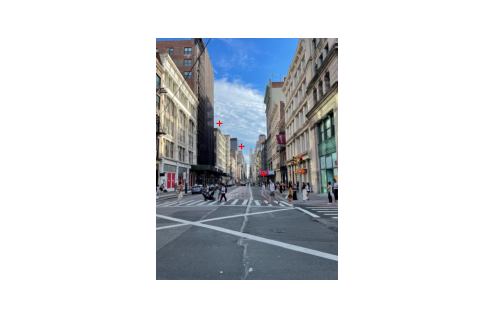

In [61]:
filename = 'images/1.jpg'
img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB).astype('double') / 255.0 

import matplotlib.pyplot as plt
%matplotlib notebook
coords = specify_mask(img)

<IPython.core.display.Javascript object>


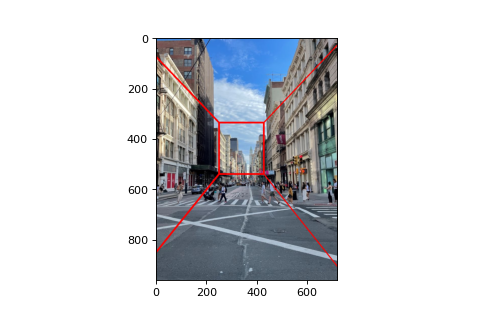

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [62]:
display = display_box(coords, img) #img does not change